# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [3]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [4]:
L = 0.5
Rw = 0.3

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [5]:
def draw_arena(xmin=-5, xmax=5, ymin=-5, ymax=5):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

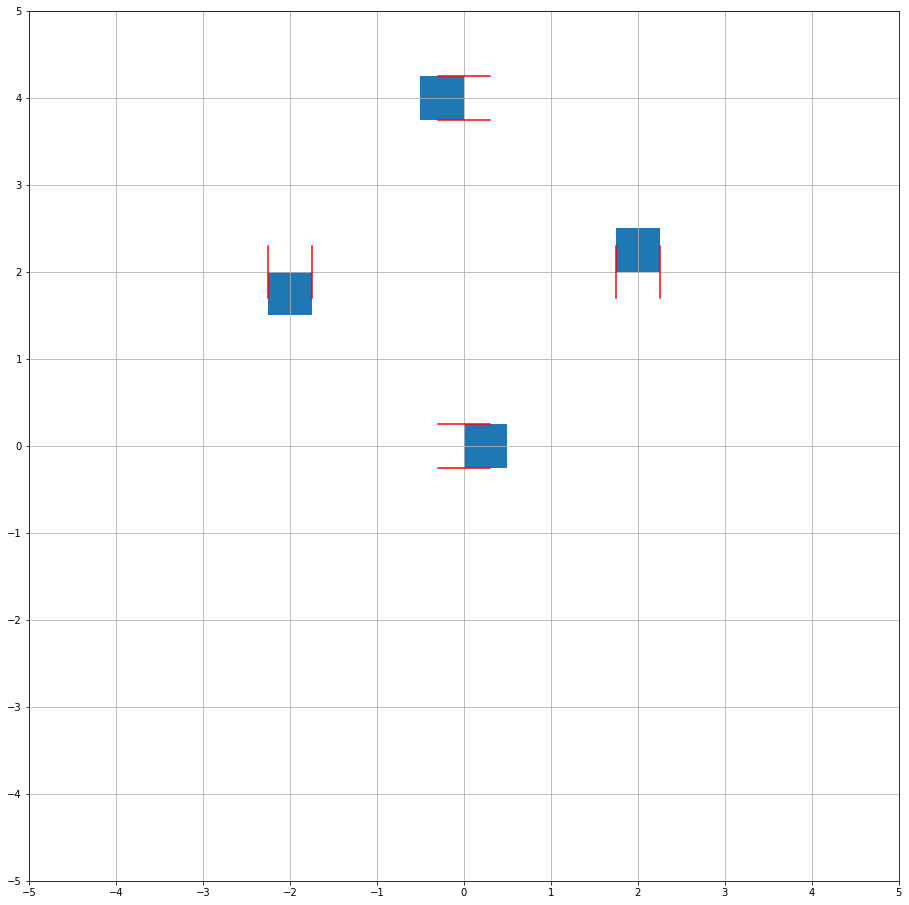

In [6]:
from matplotlib import pyplot as plt, patches

def draw_wheelchair(x, y, theta):
    #Coordonates of the center of the right wheel
    x1 = x + sin(theta)*L/2
    y1 = y - cos(theta)*L/2

    #Coordonates of the center of the left wheel
    x2 = x - sin(theta)*L/2
    y2 = y + cos(theta)*L/2

    #Wheel de droite
    x1_ = linspace(x1-cos(theta)*Rw,x1+cos(theta)*Rw, 100)
    y1_ = linspace(y1-sin(theta)*Rw,y1+sin(theta)*Rw, 100)

    plot(x1_, y1_, 'r-')

    #Wheel de gauche
    x2_ = linspace(x2-cos(theta)*Rw,x2+cos(theta)*Rw, 100)
    y2_ = linspace(y2-sin(theta)*Rw,y2+sin(theta)*Rw, 100)

    plot(x2_, y2_, 'r-')

    #Draw the wheelchair
    rectangle = patches.Rectangle((x1, y1), L, L, linewidth=2, angle=theta*180/pi)
    gca().add_patch(rectangle)
    
draw_arena()
draw_wheelchair(0,0,0)
draw_wheelchair(2, 2, np.pi/2)
draw_wheelchair(0, 4, np.pi)
draw_wheelchair(-2, 2, 3*np.pi/2)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:**

Les vitesses linéaires des roues sont données par :

V𝑙 = 𝑅𝑤 * 𝜔𝑙

V𝑟 = 𝑅𝑤 * 𝜔𝑟

où V𝑙 et V𝑟 sont les vitesses linéaires des roues gauche et droite, respectivement.

La vitesse 𝑉 de la chaise roulante est donnée par :

V = (V𝑙 + V𝑟) / 2

𝑉  est liée aux vitesses angulaires des roues par :

V = $\frac{Rw}{2} (\omega_r +  \omega_l  $ )

On sait que : 𝑥˙ = V𝑥 = V * cos(𝜃)     
et     𝑦˙ = V𝑦 = V * sin(𝜃)   
et      $\dot{\theta}$ = (V𝑟 - V𝑙) / 𝐿

Tel que $\dot{x}$ représente la vitesse selon l'axe x du centre de l'axe de roue,  $\dot{y}$  représente la vitesse selon l'axe y, et $\dot{\theta}$ représente la vitesse angulaire de la chaise.

En remplaçant 𝑉,V𝑟 et V𝑙 , nous obtenons :

$\dot{\theta} =\frac{Rw}{L}×( \omega_r  - \omega_l  ) $

$\dot{x} =\frac{Rw}{2}cos(\theta)×(\omega_r + \omega_l)$

$\dot{y} =\frac{Rw}{2}sin(\theta)×(\omega_r + \omega_l)$



### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:**

Si on modélise ce problème dans un champs de vecteurs, sa condition initiale va etre associée à un vecteur du champs. Puisque le champs de vecteurs est continuement différentiable, il existe une solution unique à ce problème de valeur initiale. Donc le systeme est bien-posé.

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**

Si les forces et données ne varient pas, mathématiquement, les dérivées de 𝑥, 𝑦 et 𝜃 par rapport à 𝑡 sont bornées et ne peuvent pas tendre vers l'infini et donc la trajectoire suivie par les variables x,y et 𝜃 est globale : elle est valide sur tout t. Ainsi la solution maximale est globale.

Par contre si les données du systeme dépendent des variables x,y et 𝜃, la variation de ces variables avec le temps peut tendre vers l'infini avec certaines valeurs initiales. Donc la solution devient plutot locale.

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [7]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [8]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = omega(t, xytheta)
    dx = Rw * 0.5 * (omega_l + omega_r) * cos(theta)
    dy = Rw * 0.5 * (omega_l + omega_r) * sin(theta)
    dtheta = Rw * (omega_r - omega_l) / L
    return array([dx, dy, dtheta])
    

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [9]:
r = solve_ivp(fun=fun, t_span =(0.0, 4.0), y0=[0.0, 0.0, 0.0], dense_output=True)

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

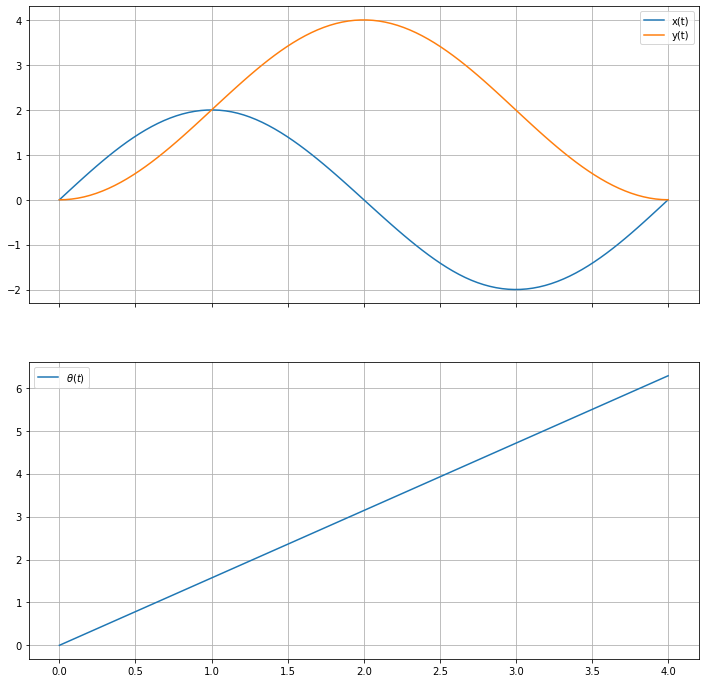

In [10]:
t = linspace(0.0, 4.0, 100)
x, y, theta = r["sol"](t)
fig=figure(figsize=(12, 12))
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.grid(True)
ax1.plot(t, x, label="x(t)")
ax1.plot(t, y, label="y(t)")
ax1.legend()
ax2.grid(True)
ax2.plot(t, theta, label=r"$\theta(t)$")
ax2.legend()


🧩 Use the simulation results to display the robot location every 0.5 second.

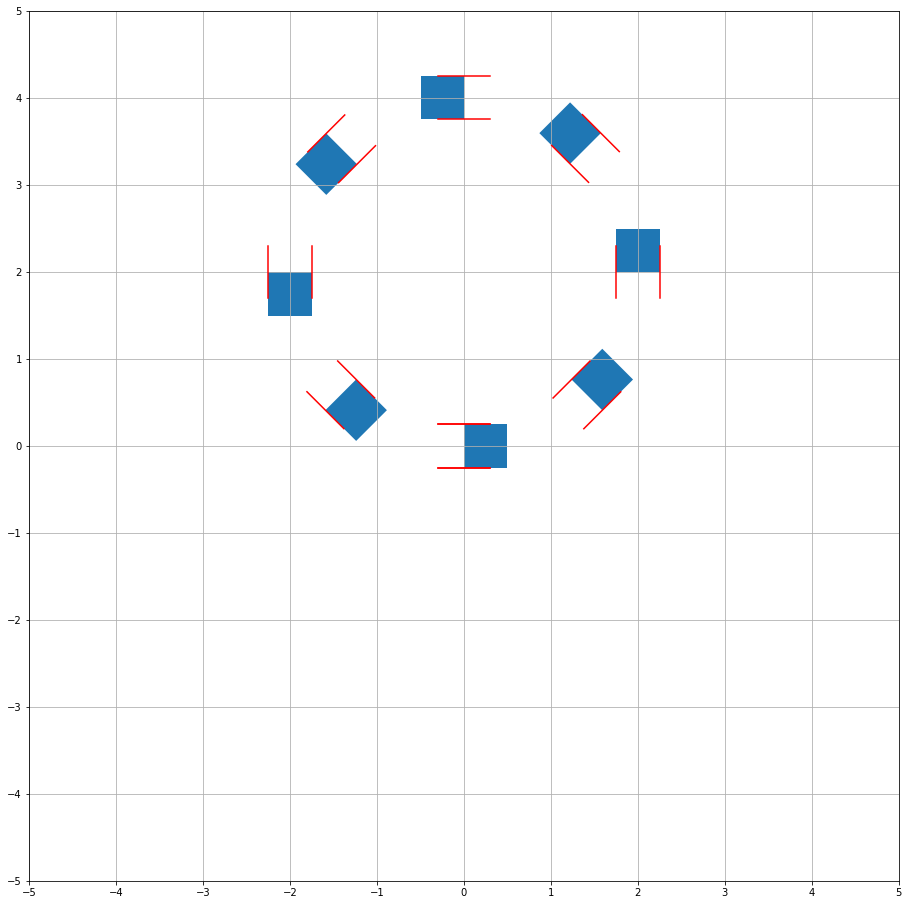

In [11]:
draw_arena()
t = linspace(0.0, 4.0, 9)
solution = r["sol"](t)
for x, y, theta in solution.T:
    draw_wheelchair(x, y, theta)

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

$\theta(t) = (\pi / 2)t$, $x(t) =2 \sin(\pi t / 2)$ et $y(t) = -2* \cos(\pi t /2)+2$.

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

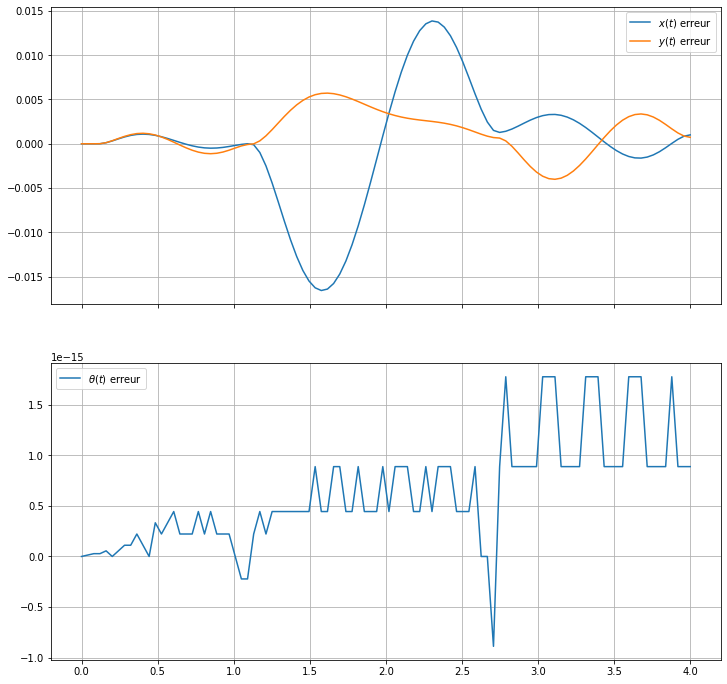

In [12]:
t = linspace(0.0, 4.0, 100)
xt, yt, thetat = r["sol"](t)
fig=figure(figsize=(12, 12))
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.grid(True)
ax1.plot(t , xt - 2*sin(pi*t/2), label="$x(t)$ erreur")
ax1.plot(t , yt + 2*cos(pi*t/2)-2 , label="$y(t)$ erreur")
ax1.legend()
ax2.grid(True)
ax2.plot(t, thetat - (pi / 2)*t, label=r"$\theta(t)$ erreur")
ax2.legend()

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

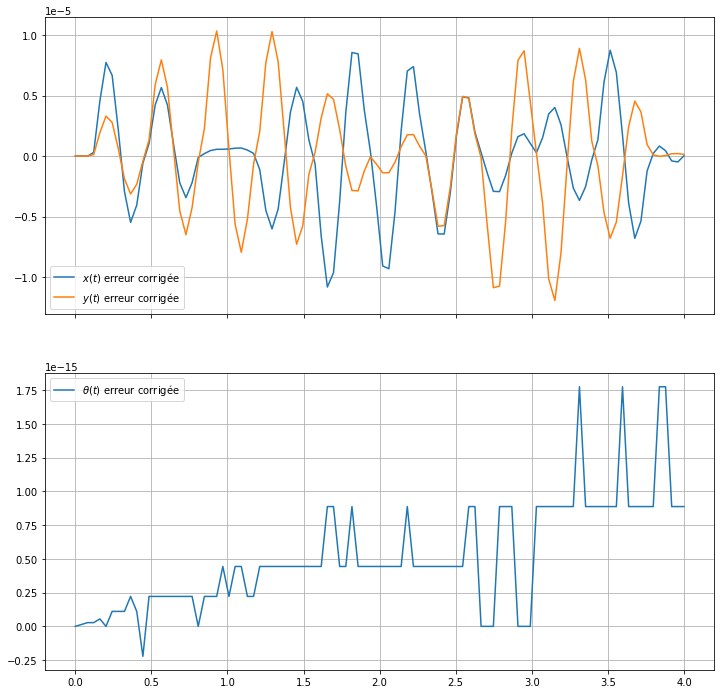

In [17]:
r = solve_ivp(fun=fun, t_span =(0.0, 4.0), y0=[0.0, 0.0, 0.0], rtol=2e-7, dense_output=True)
t = linspace(0.0, 4.0, 100)
xt, yt, thetat = r["sol"](t)
fig=figure(figsize=(12, 12))
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.grid(True)
ax1.plot(t , xt - 2*sin(pi*t/2), label="$x(t)$ erreur corrigée")
ax1.plot(t , yt + 2*cos(pi*t/2)-2 , label="$y(t)$ erreur corrigée")
ax1.legend()
ax2.grid(True)
ax2.plot(t, thetat - (pi / 2)*t, label=r"$\theta(t)$ erreur corrigée")
ax2.legend()